In [43]:
import numpy as np
import matplotlib.pyplot as plt

X = [[3, 3],[4,3],[1,1]]
Y = [1,1,-1]

class Perceptron(object):
    def __init__(self, X, Y, lr=0.5):
        data_dim = len(X[0])
        self.w = np.zeros(data_dim, dtype=float)
        self.b = float(0)
        self.X = X
        self.Y = Y
        self.lr = lr
    
    def dot(self, x):
        sum = 0
        for i, w in enumerate(self.w):
            sum += w * x[i]
        return sum

    def train(self):
        flag = True
        while flag:
            flag = False
            for i, x in enumerate(self.X):
                if self.Y[i]*(self.dot(x) + self.b) <= 0:
                    self.w += self.lr * self.Y[i] * x
                    self.b += self.lr * self.Y[i]
                    flag = True
    
    def paint(self):
        X = self.X
        Y = self.Y
        if len(X[0]) != 2:
            print("暂时不支持",len(self.X[0]),"维数据绘制")
            return
        plt.title("感知机结果")
        plt.rcParams['font.sans-serif']=['SimHei']
        # 画散点图并且求出边界
        bounds = np.zeros(2*len(X[0]))
        for i, x in enumerate(X):
            if Y[i] == 1:
                plt.scatter(x[0], x[1], c='r', marker='^',alpha=0.65)
            else:
                plt.scatter(x[0], x[1], c='b', marker='o',alpha=0.65)
            for i, n in enumerate(x):
                index = 2 * i
                if bounds[index] > n - 1:
                    bounds[index] = n - 1
                if bounds[index+1] < n + 1:
                    bounds[index+1] = n + 1
        plt.axline((-self.b/self.w[0],0),(0,-self.b/self.w[1]),color="black",ls="--",lw=2.5)
        plt.xlim(bounds[0],bounds[1])
        plt.ylim((bounds[2], bounds[3]))
        plt.show()

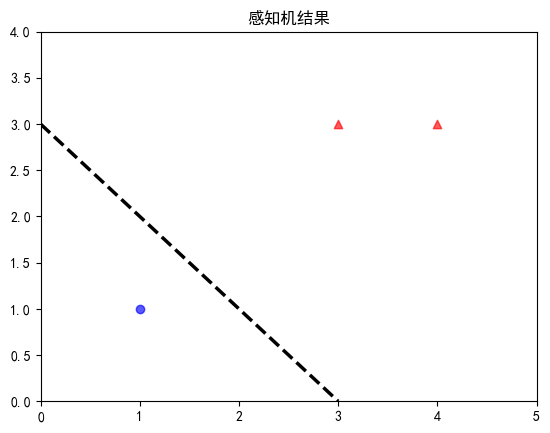

In [44]:
p = Perceptron(np.array(X, dtype=float), np.array(Y, dtype=int))
p.train()
p.paint()